In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mm
# Set random seed for reproducibility
np.random.seed(42)

# Generate 500 CGPA values between 5.0 and 10.0
cgpa = np.random.uniform(5.0, 10.0, 500)

# Create a realistic relationship between CGPA and package (in LPA)
package = 1.5 * cgpa + np.random.normal(0, 1, 500) + 2

# Create DataFrame
pp = pd.DataFrame({
    'CGPA': cgpa.round(2),
    'Package (LPA)': package.round(2)
})

# Save as CSV file
pp.to_csv("CGPA_vs_Package.csv", index=False)

print("✅ CSV file 'CGPA_vs_Package.csv' created successfully!")
pp

✅ CSV file 'CGPA_vs_Package.csv' created successfully!


,CGPA,Package (LPA)
0,6.87,12.65
1,9.75,18.51
2,8.66,15.94
3,7.99,13.41
4,5.78,9.77
...,...,...
495,6.77,11.62
496,7.92,13.39
497,5.39,11.13
498,9.87,17.49


In [2]:
x=pp.iloc[:,0:1]
y=pp.iloc[:,-1]
y

0      12.65
1      18.51
2      15.94
3      13.41
4       9.77
       ...  
495    11.62
496    13.39
497    11.13
498    17.49
499    18.74
Name: Package (LPA), Length: 500, dtype: float64

Text(0, 0.5, 'PACKAGE(LPA)')

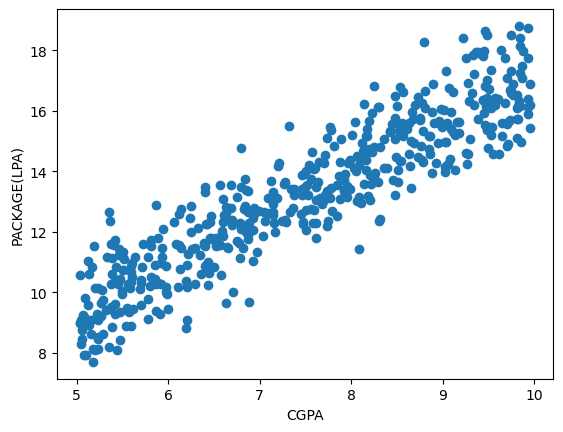

In [3]:
mm.scatter(x,y)
mm.xlabel("CGPA")
mm.ylabel("PACKAGE(LPA)")

In [4]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [5]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [6]:
xtrain.iloc[0] # but our model LR expects one row and one column which is 2D ,and our model input is 1D so 
# we will reshape its value using reshape() during predicting

CGPA    6.75
Name: 428, dtype: float64

In [7]:
lr.predict(xtest)# predict the 20 % of data of original data

array([13.31824887, 16.29274543,  9.98368167, 15.08729156, 11.23610128,
       11.6274824 , 16.76240278, 14.80549715, 14.30452931, 15.87005381,
       13.45914607, 10.6881677 , 14.27321882, 11.06389358, 11.81534534,
       16.27709018, 14.11666637, 12.25369221, 12.112795  , 14.72722092,
       10.24982084, 13.02079921, 15.11860205,  9.51402432, 13.56873279,
        9.45140334, 12.70769431, 13.27128313,  9.90540545, 14.11666637,
        9.5766453 , 14.42977127, 10.8603754 , 14.28887406, 12.41024466,
       11.98755304, 10.6881677 ,  9.52967957, 10.57858099, 11.43961946,
       15.16556778, 12.89555725, 12.87990201, 11.75272436, 16.54322935,
       12.26934745, 17.04419719, 16.35536641, 11.29872226, 14.25756357,
        9.40443761,  9.62361104, 10.09326839, 13.25562789, 16.91895523,
       10.04630265,  9.84278447, 15.60391465, 13.89749294, 10.5472705 ,
       15.16556778, 12.34762368, 11.22044603, 13.8505272 , 16.95026572,
       16.65281606, 13.77225098, 10.42202854, 10.28113133, 12.75

In [8]:
xtest

,CGPA
129,7.55
280,9.45
440,5.42
384,8.68
225,6.22
...,...
387,5.89
117,5.93
468,6.12
395,9.65


In [9]:
ytest# the student who has 8.51 cgpa score 9 marks verifying it but this is an outlier maybe we can get wrong [rediction

129    14.09
280    15.92
440    11.72
384    15.72
225    11.27
       ...  
387    11.80
117    11.46
468    12.60
395    15.15
146    14.01
Name: Package (LPA), Length: 100, dtype: float64

In [10]:
lr.predict(xtest.iloc[0].values.reshape(1,1)) # nearly 14 lpa, not too good

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.31824887])

In [11]:
slope=lr.coef_
intercep=lr.intercept_
print(slope) # how much y changes with 1 unit of x 
print(intercep) # when cgpa  is 0 means mx =0 , at point 33 the line crosses y or when the weightage of the x(cgpa)
# is neglecible(0) the intercept is the predicted marks for the inputs which is 33.97 in our case 

[1.5655245]
1.4985388593204991


# Verifying the predicted value using y=mx+c
# m=weightage of the x on y

In [12]:
# y=mx+c LR equation
# for 7.55 cgpa ytest package is 14.09 and predicted value is 13.31
slope*7.55 + intercep # here predicted value and this equation value is same , Verified

array([13.31824887])

# Verifying the intercept concept using equation of line 

In [13]:
print(slope*0 + intercep) # verified 1.4 id the intercept

[1.49853886]


Text(0.5, 1.0, 'The best fit line')

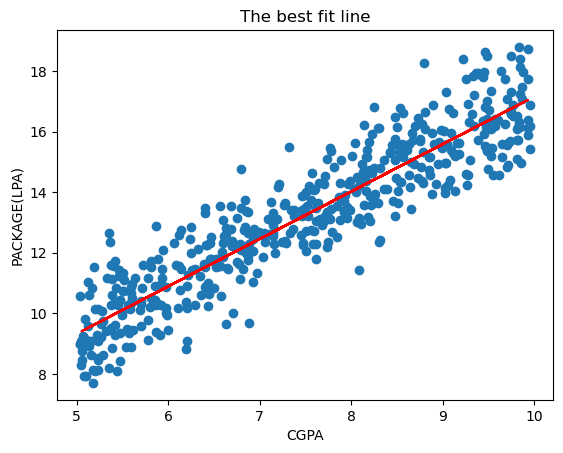

In [14]:
mm.scatter(x,y)
mm.plot(xtest,lr.predict(xtest),color='red')
mm.xlabel("CGPA")
mm.ylabel("PACKAGE(LPA)")
mm.title("The best fit line")

# Regression Metrices For checking the model performance

In [16]:
y_pred=lr.predict(xtest)

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [22]:
print("MAE:",mean_absolute_error(ytest,y_pred))#model’s predictions are 0.78 units away from the true package values.
# MOre need to minimize the mae
print("MSE:",mean_squared_error(ytest,y_pred)) # same meaning but not the same unit as package because it is the square
print("RMSE:",np.sqrt(mean_squared_error(ytest,y_pred))) # RMSE is nearly equal to MSE because the mse value is nearly 1
# And our model prediction is good , not too bad

MAE: 0.7877028512434607
MSE: 0.9267844285052769
RMSE: 0.9626964363210643


# R2 score for Model

In [27]:
print("R2_score:",r2_score(ytest,y_pred))
print("R2 score is increasing towards 1 means our model prediction is good ,but for better like after adding irrelevant features r2 score remains same or increasing it should be decrease Calculating adjusted r2 score for this")
r2=r2_score(ytest,y_pred)


R2_score: 0.8318970357875681
R2 score is increasing towards 1 means our model prediction is good ,but for better like after adding irrelevant features r2 score remains same or increasing it should be decrease Calculating adjusted r2 score for this


# adusted r2_score

In [30]:
xtest.shape# no. of rows n=100, no.of columns=k=1
n=100
k=1

In [34]:
adjusted_r2_score=1-((1-r2)*(n-1)/(n-1-k))
print(adjusted_r2_score)# now it nearly equal to r2 score

0.8301816994180535


# Verifying the essence of adjusted r2 score
but for better like after adding irrelevant features r2 score remains same or increasing it should be decrease Calculating adjusted r2 score for this

In [48]:
new_pp=pp.copy()
new_pp['irrelevant_feature']=np.random.random(len(new_pp))
new_pp.head()

,CGPA,Package (LPA),irrelevant_feature
0,6.87,12.65,0.737885
1,9.75,18.51,0.704554
2,8.66,15.94,0.422729
3,7.99,13.41,0.346524
4,5.78,9.77,0.397612


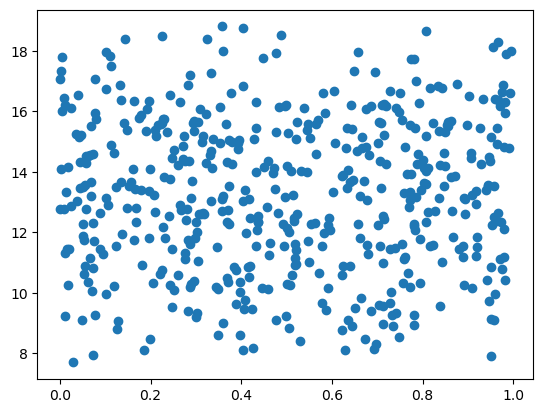

In [44]:
mm.scatter(new_pp['irrelevant_feature'],new_pp['Package (LPA)'])

In [51]:
x=new_pp.iloc[:,[0,2]]
y=new_pp.iloc[:,1:2]
x


,CGPA,irrelevant_feature
0,6.87,0.737885
1,9.75,0.704554
2,8.66,0.422729
3,7.99,0.346524
4,5.78,0.397612
...,...,...
495,6.77,0.062565
496,7.92,0.210507
497,5.39,0.809024
498,9.87,0.146922


In [52]:
from sklearn.model_selection import train_test_split
xtrain2,xtest2,ytrain2,ytest2=train_test_split(x,y,test_size=0.2,random_state=2)

In [53]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain2,ytrain2)

LinearRegression()

In [56]:
y_pred2=lr.predict(xtest2)

In [66]:
#r2 score
r2_s=r2_score(ytest2,y_pred2)
print("R2_score:",r2_s) 
print("by adding irrelevant feature R2 score is increased it should be reduce but not that's why we will use adjusted r2 score")

R2_score: 0.8360572775810706
by adding irrelevant feature R2 score is increased it should be reduce but not that's why we will use adjusted r2 score


In [69]:
from sklearn.metrics import r2_score

# Calculate R²
r2_s = r2_score(ytest2, y_pred2)
print("R2_score:", r2_s)

# Explanation print
print("By adding an irrelevant feature, R² increased — it should reduce, but it doesn’t. That’s why we use Adjusted R².")

# Calculate Adjusted R²
n = 100  # number of samples
k = 2    # number of features in your model
adjust_r2_s = 1 - (1 - r2_s) * (n - 1) / (n - k - 1)
print("Adjusted R2_score:", adjust_r2_s)


R2_score: 0.8360572775810706
By adding an irrelevant feature, R² increased — it should reduce, but it doesn’t. That’s why we use Adjusted R².
Adjusted R2_score: 0.8326770152631545
